# EDA Case Study - Lending Club

### Contributors: 

1. Amar Nath Pandey
2. Ashish Swamy

### Assignment summary

**Lending Club** is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
 When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

## Exploratory Data Analysis

# Data understanding

Let's start with importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

import re

Reading the loan data file.

In [2]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [3]:
# Let us look at first few rows of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
# Looking at all the column names
print(loan.columns[0:25])
print(loan.columns[25:50])
print(loan.columns[50:75])
print(loan.columns[75:87])

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti'],
      dtype='object')
Index(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med'],
      dtype='object')
Index(['mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_j

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

"loan_status" is something interesting and holds the status of loan - fully paid, current or charged off.

#  Data Cleaning

Some columns have a large number of missing values. We will fix the missing value first and then we will check other data quality problems.

Missing values per column expressed as % of total number of values

In [7]:
#summary
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


There are many columns in the data with 100% missing values, some have 65%, 33% etc. Lets remove all the columns having 100% missing values.

In [9]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

We drop the above columns from our analysis.

In [10]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [11]:
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


There are 2 columns having 32 and 64% approx missing values. These columns are 'desc' and 'mths_since_last_delinq'. Let us check what these column holds

In [12]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


From data dictionary, 'desc' coulumn is Loan description provided by the borrower and 'mths_since_last_delinq' is The number of months since the borrower's last delinquency. desc is just the description and mths_since_last_delinq is the data post loan is sanctioned. So they can not be used to decide if loan can be approved or rejected.

Hence, dropping these two fields.

In [13]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
loan.shape

(39717, 53)

We have now 53 columns.

In [15]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are few more columns with very less percentage of missing values. We will keep them as it is for now. These columns will not be used in analysis. These columns are, emp_title, emp_length, revol_util , title, last_pymnt_d etc..

Let us now check null values across rows.

In [16]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

By looking at the above reuslt. it looks like we have at the most 5 missing values. Let us check if we have more than 5 missing values

In [17]:
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

This mean we don't have more than 5 missing data in row. We can leave them as it is.

Let us now check data format for columns

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

'int_rate' is interest rate on loan, which is not numeric and it has '%' sign

In [19]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

Employee lenth i.e. emp_length is of format like 10+ years, <1 year, we will extract numeric part of it.

In [21]:
loan = loan[~loan['emp_length'].isnull()]

In [22]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [23]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

# Data Analysis

The objective is to identify predictors of default, so that at the time of loan application, we can use those variables for approval/rejection of the loan. We can divide these identifiers in 3 types:
1. Variables which are related to the applicant such age, occupation, employment details etc...
2. Variables related to the loan such as amount of loan, interest rate, purpose of loan etc..
3. Variables realted to the behaviour of customer after loan is approved such as delinquency, revolving balance, next payment date etc...

point(3) is not applicable as this data would be not available at the time of loan application. So, we will consider (1) and (2)

List of behavioural variables:
delinq_2yrs,
earliest_cr_line,
inq_last_6mths,
open_acc,
pub_rec,
revol_bal,
revol_util,
total_acc,
out_prncp,
out_prncp_inv,
total_pymnt,
total_pymnt_inv,
total_rec_prncp,
total_rec_int,
total_rec_late_fee,
recoveries,
collection_recovery_fee,
last_pymnt_d,
last_pymnt_amnt,
last_credit_pull_d,
application_type

In [24]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [25]:
# let us now remove the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [26]:
#Dropping some more columns which are seems to be not relevant
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Let us now take a look at the column "loan_status" which is relevant variable.

In [27]:
df['loan_status'] = df['loan_status'].astype('category')

In [28]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

The "current" loan is which is ongoing and we cannot be considered as defaulted. We we need to concentrate is on "Charged off". "Fully paid" is the one which has paid the loan completely. 

In [29]:
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [30]:
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [31]:
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

Let us do the following analysis on this variable:
1. univariate 
2. bivariate
    

# Univariate Analysis

In [32]:
round(np.mean(df['loan_status']), 2)

0.14

About 14% are defaulter. Since those with "Charged off" are having value 1. So, it takes into account only those values.

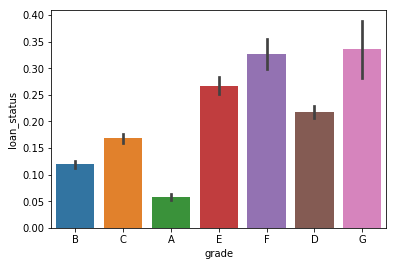

In [33]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [34]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32145.0,10930.419972,7206.743260,500.0,5400.0,9600.0,15000.0,35000.0
1,5399.0,12244.077607,8086.515636,900.0,6000.0,10000.0,17000.0,35000.0


#### Observation
1. Most of the loans granted are below 15000 (75 percentile value)
2. Charged off loans (loan_status = 1) are shifted towards higher average loan amount request.

In [35]:
#Let us define a common plot function which will take different categorical values to plot it against loan status
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

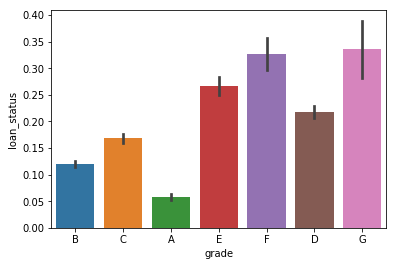

In [36]:
plot_cat('grade')

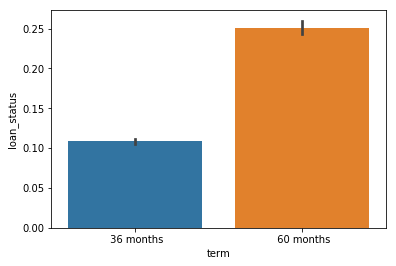

In [37]:
plot_cat('term')

This means 60 months defaults more than 36 months loan term

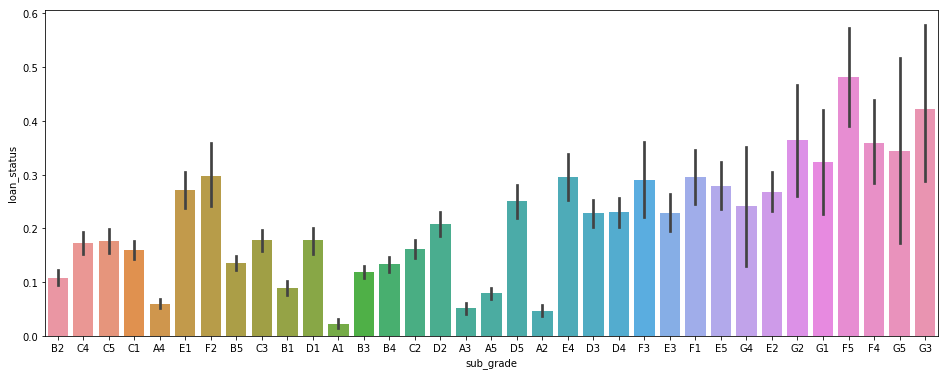

In [39]:
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

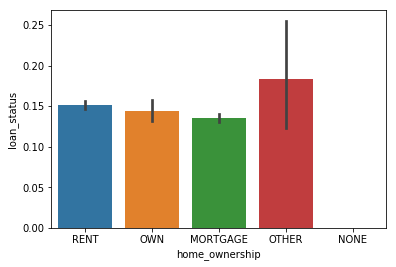

In [40]:
plot_cat('home_ownership')

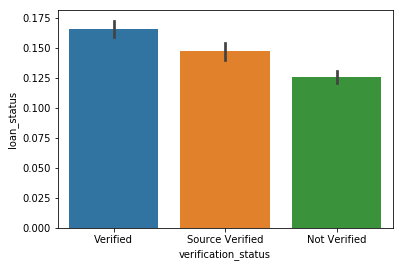

In [41]:
plot_cat('verification_status')

Verified loans are more defaulted than those which are not verified. This is bit surprising.

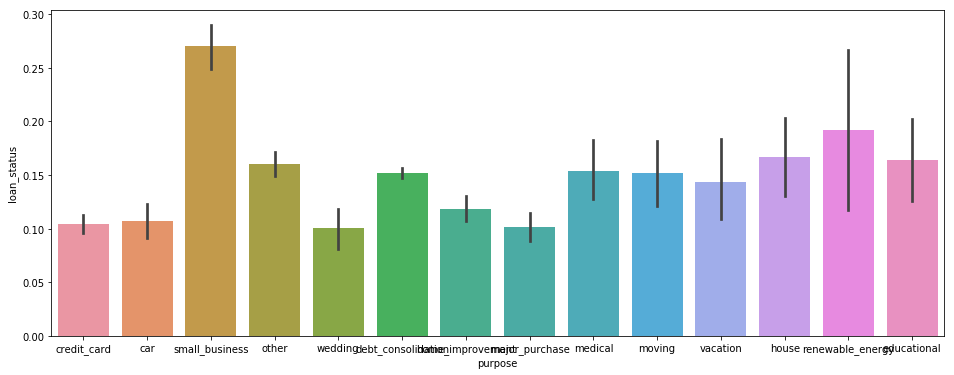

In [43]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

Observation: Small business loans default the most, then renewable energy and education

Let us take the column 'issue_d' that is the month which the loan was funded.

In [44]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [45]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [46]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [47]:
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

2011 has the highest number of granted loans. Numbers has increased over the years

In [48]:
#month-wise count
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

December month has the highest number of granted loans

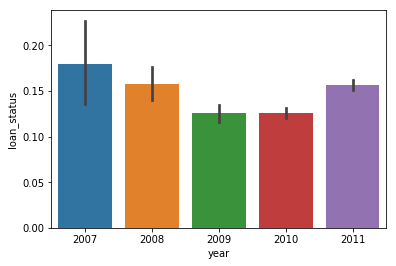

In [49]:
plot_cat('year')

The default rate has gradually decreased untill 2009 and then suddenly increased in 2011

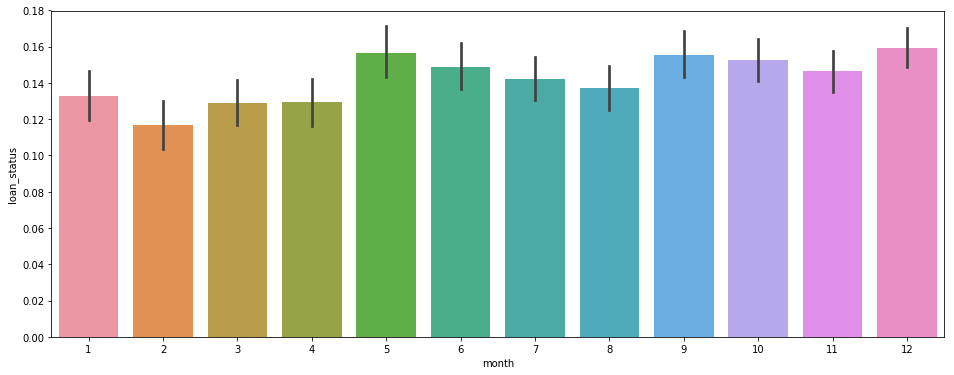

In [50]:
plt.figure(figsize=(16, 6))
plot_cat('month')

Not much variations in default rates across months.

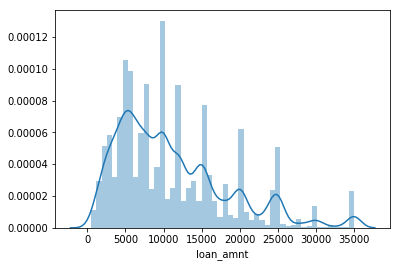

In [52]:
sns.distplot(df['loan_amnt'])
plt.show()

In [53]:
df.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Median of loan_amt is **10000**

In order to analyse the distribution of loans, we will create bins of low, medium and high variables based on loan amount disbersed.

In [54]:
# common code create a bins
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

#apply the function to create bins    
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [56]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

So, highest number of disbursements in the medium range bucket.

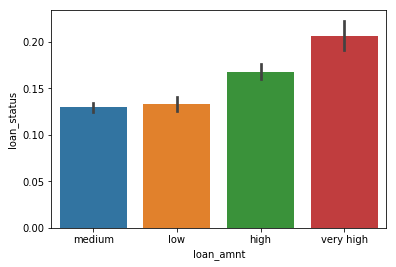

In [57]:
plot_cat('loan_amnt')

This shows that default rate is high in the loan disbursement of very high range.

In [58]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

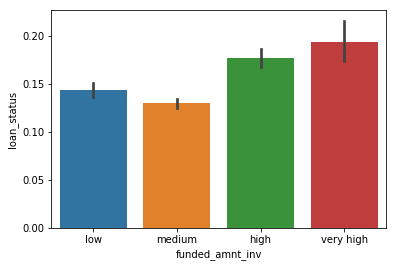

In [59]:
plot_cat('funded_amnt_inv')

Interest rate i.e. **int_rate** is also an important variable. We will create bins for the interest rate as well
in category low, medium and high.

In [60]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

In [62]:
df.int_rate.value_counts()

medium    17880
low       11834
high       7830
Name: int_rate, dtype: int64

Let us plot